In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

In [280]:
# loans_tr 데이터를 load
dataset = pd.read_csv('loans_tr.csv')

In [281]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


In [282]:
dataset.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.119,829.10,11.350,19.48,737,5639.958,28854,52.1,0,0,0,0
1,1,1,credit_card,0.107,228.22,11.082,14.29,707,2760.000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.136,366.86,10.373,11.63,682,4710.000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.101,162.34,11.350,8.10,712,2699.958,33667,73.2,1,0,0,0
4,4,1,credit_card,0.143,102.92,11.300,14.97,667,4066.000,4740,39.5,0,1,0,0


In [283]:
dataset["not.fully.paid"].mean()

0.1595943110282117

In [284]:
dataset["pub.rec"].mean()

0.062252273257169505

In [285]:
print(dataset.shape)

(8578, 15)


In [286]:
pd.set_option('precision', 3)
pd.set_option('display.width', 120)
print(dataset.describe())

       Unnamed: 0  credit.policy  int.rate  installment  log.annual.inc       dti      fico  days.with.cr.line  \
count    8578.000       8578.000  8578.000     8578.000        8578.000  8578.000  8578.000           8578.000   
mean     4798.573          0.804     0.123      318.093          10.932    12.622   710.750           4547.757   
std      2766.006          0.397     0.027      206.994           0.616     6.882    38.088           2494.932   
min         0.000          0.000     0.060       15.670           7.548     0.000   612.000            178.958   
25%      2399.250          1.000     0.104      163.570          10.556     7.242   682.000           2792.781   
50%      4804.500          1.000     0.122      267.740          10.929    12.660   707.000           4110.042   
75%      7193.500          1.000     0.141      430.750          11.294    17.960   737.000           5729.958   
max      9576.000          1.000     0.216      940.140          14.528    29.960   827.

In [287]:
print(dataset.corr(method='pearson'))

                   Unnamed: 0  credit.policy  int.rate  installment  log.annual.inc    dti   fico  days.with.cr.line  \
Unnamed: 0              1.000         -0.687     0.283        0.051           0.010  0.096 -0.187             -0.025   
credit.policy          -0.687          1.000    -0.295        0.062           0.037 -0.092  0.349              0.094   
int.rate                0.283         -0.295     1.000        0.274           0.057  0.225 -0.717             -0.121   
installment             0.051          0.062     0.274        1.000           0.450  0.045  0.089              0.185   
log.annual.inc          0.010          0.037     0.057        0.450           1.000 -0.056  0.113              0.335   
dti                     0.096         -0.092     0.225        0.045          -0.056  1.000 -0.242              0.057   
fico                   -0.187          0.349    -0.717        0.089           0.113 -0.242  1.000              0.262   
days.with.cr.line      -0.025          0

In [288]:
del dataset['delinq.2yrs']

In [289]:
del dataset['days.with.cr.line']

In [290]:
del dataset['log.annual.inc']

In [291]:
del dataset['Unnamed: 0']

In [292]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [293]:
labelencoder = LabelEncoder()

In [294]:
dataset['purpose'] = labelencoder.fit_transform(dataset['purpose'])

In [295]:
dataset.head(5)

,credit.policy,purpose,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,1,2,0.119,829.10,19.48,737,28854,52.1,0,0,0
1,1,1,0.107,228.22,14.29,707,33623,76.7,0,0,0
2,1,2,0.136,366.86,11.63,682,3511,25.6,1,0,0
3,1,2,0.101,162.34,8.10,712,33667,73.2,1,0,0
4,1,1,0.143,102.92,14.97,667,4740,39.5,0,0,0


In [296]:
print(dataset.corr(method='pearson'))

                credit.policy  purpose  int.rate  installment    dti   fico  revol.bal  revol.util  inq.last.6mths  \
credit.policy           1.000    0.017    -0.295        0.062 -0.092  0.349     -0.188      -0.106          -0.529   
purpose                 0.017    1.000     0.117        0.154 -0.054  0.057      0.043      -0.063           0.037   
int.rate               -0.295    0.117     1.000        0.274  0.225 -0.717      0.095       0.470           0.202   
installment             0.062    0.154     0.274        1.000  0.045  0.089      0.230       0.076          -0.010   
dti                    -0.092   -0.054     0.225        0.045  1.000 -0.242      0.186       0.341           0.026   
fico                    0.349    0.057    -0.717        0.089 -0.242  1.000     -0.014      -0.542          -0.185   
revol.bal              -0.188    0.043     0.095        0.230  0.186 -0.014      1.000       0.200           0.021   
revol.util             -0.106   -0.063     0.470        

In [297]:
plt.rcParams['figure.figsize'] = (15,15)

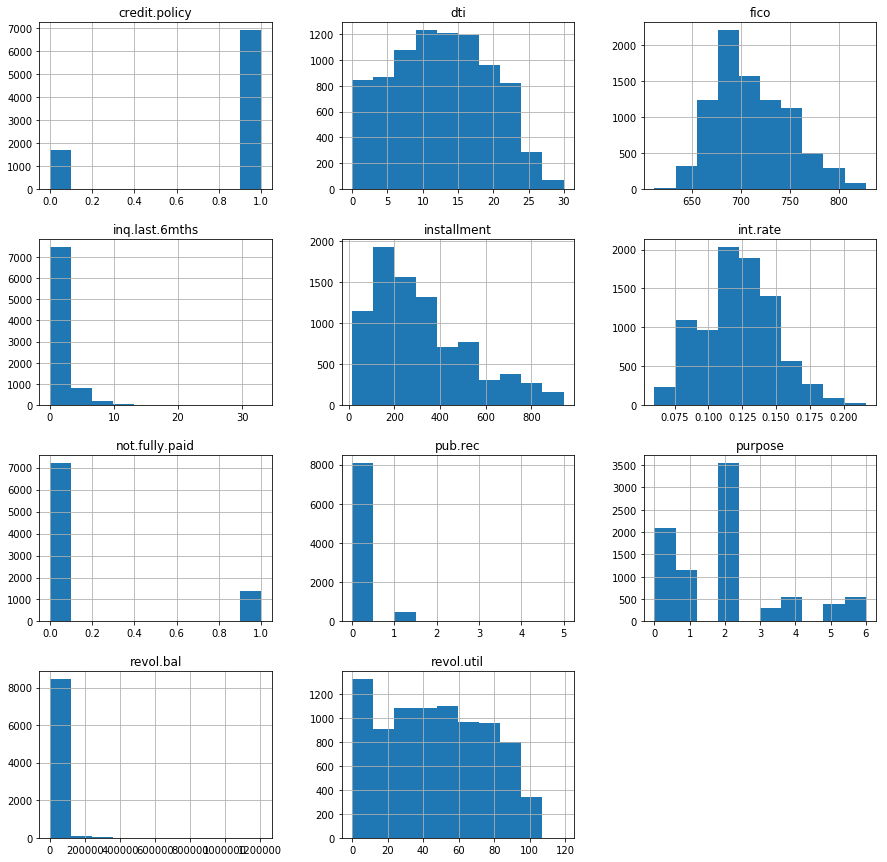

In [298]:
dataset.hist()
plt.show()

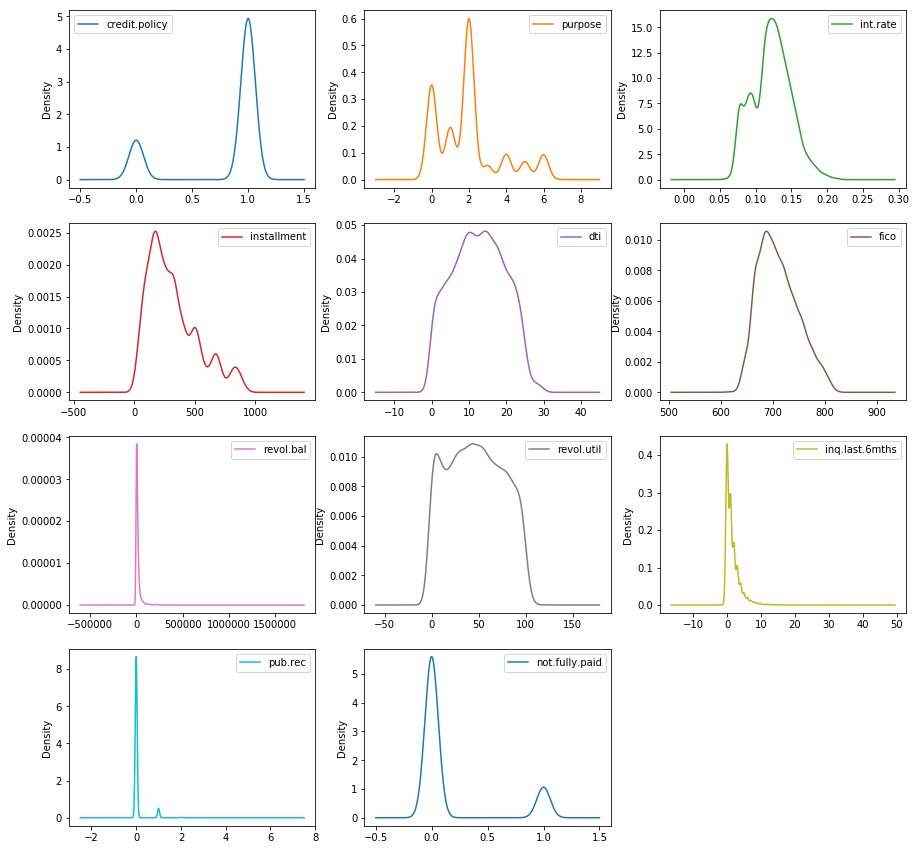

In [299]:
dataset.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

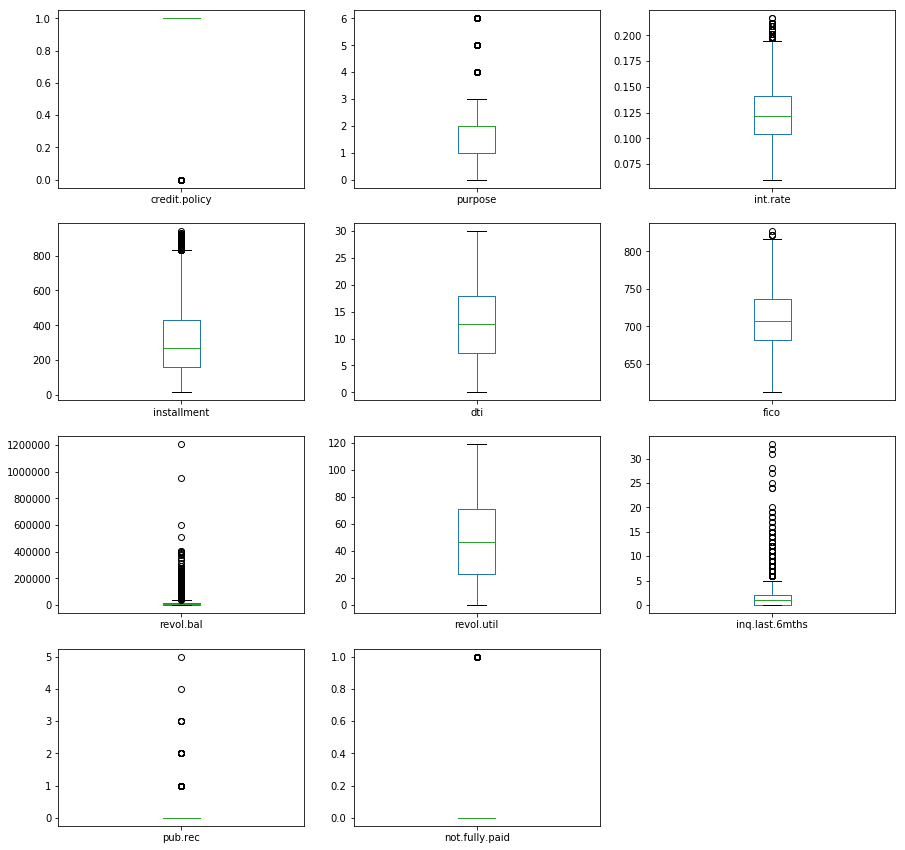

In [300]:
dataset.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.show()

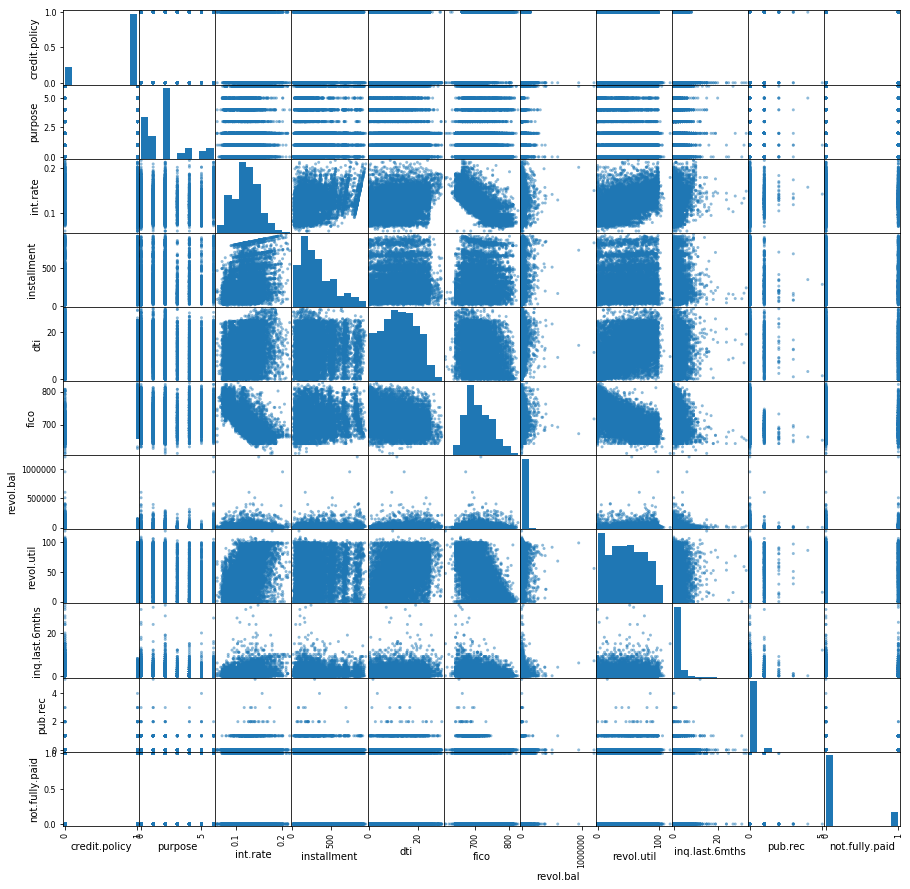

In [301]:
scatter_matrix(dataset)
plt.show()

# Exploratory Data Aanalysis

In [354]:
# X_data, y_data division
# train data, test data division
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [355]:
# Compare Algorithms - model selection
num_folds = 5
seed = 13
scoring = 'accuracy'

In [356]:
# Compare Algorithms - model selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))

In [357]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                             solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_sampl

In [358]:
# cross validaton을 통해 optimal model selection

results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
print(results)

ScaledLR: 0.940982 (0.006673)
ScaledLDA: 0.938067 (0.007480)
ScaledKNN: 0.938504 (0.005872)
ScaledCART: 0.883855 (0.005657)
ScaledNB: 0.908193 (0.010806)
ScaledRF: 0.939961 (0.005598)
[array([0.93008012, 0.93663511, 0.946793  , 0.94752187, 0.94387755]), array([0.92716679, 0.93153678, 0.946793  , 0.94387755, 0.9409621 ]), array([0.92935178, 0.93372178, 0.94314869, 0.94387755, 0.94241983]), array([0.87618354, 0.8798252 , 0.88556851, 0.88483965, 0.89285714]), array([0.88929352, 0.90386016, 0.91909621, 0.91690962, 0.91180758]), array([0.93153678, 0.93590677, 0.946793  , 0.94460641, 0.9409621 ])]


In [359]:
# pipeline을 활용해서 scaling하고 optimal model selection

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))

In [360]:
pipelines

[('ScaledLR', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LR',
                   LogisticRegression(C=1.0, class_weight=None, dual=False,
                                      fit_intercept=True, intercept_scaling=1,
                                      l1_ratio=None, max_iter=100,
                                      multi_class='warn', n_jobs=None,
                                      penalty='l2', random_state=None,
                                      solver='warn', tol=0.0001, verbose=0,
                                      warm_start=False))],
           verbose=False)), ('ScaledLDA', Pipeline(memory=None,
           steps=[('Scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('LDA',
                   LinearDiscriminantAnalysis(n_components=None, priors=None,
                                              shrinkage=No

In [361]:
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.940982 (0.006673)
ScaledLDA: 0.938067 (0.007480)
ScaledKNN: 0.938504 (0.005872)
ScaledCART: 0.883709 (0.005712)
ScaledNB: 0.908193 (0.010806)
ScaledRF: 0.939961 (0.005782)


In [362]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('RF', RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold( n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: 0.941419 (0.006358)
ScaledLDA: 0.938067 (0.007480)
ScaledKNN: 0.939087 (0.005617)
ScaledCART: 0.882689 (0.005469)
ScaledNB: 0.908193 (0.010806)
ScaledRF: 0.940107 (0.006288)


In [363]:
# ensemble 과 grid search를 활용한 model selection

n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["auto", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941271 using {'max_features': 'auto', 'n_estimators': 35}


In [364]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["auto", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941271 using {'max_features': 'auto', 'n_estimators': 40}


In [365]:
n_estimators_set = [5, 10, 15, 20, 25, 30, 35, 40]
max_features_set = ["auto", "log2", None]
param_grid = dict(n_estimators = n_estimators_set, max_features = max_features_set)
model = RandomForestClassifier()
kfold = KFold( n_splits = num_folds, random_state = seed)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941416 using {'max_features': 'log2', 'n_estimators': 30}


In [366]:
# GBM 
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')


#시간 측정
start_time = time.time()
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, Y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy = accuracy_score(Y_test, gb_pred)

print('GBM 정확도 :', gb_accuracy)
print('GBM 수행 시간:', time.time() - start_time)

GBM 정확도 : 0.9417249417249417
GBM 수행 시간: 1.6985409259796143


In [367]:
# GridSearchCV를 이용한 파라미터 optimization..

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100, 300], 'learning_rate':[0.05, 0.1]}

grid_1 = GridSearchCV(gb_clf, param_grid=params, cv=5, verbose=1)
grid_1.fit(X_train, Y_train)
print('optimaztion parameter:', grid_1.best_params_)
print('best accuracy : {0:.4f}'.format(grid_1.best_score_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   47.9s finished


optimaztion parameter: {'learning_rate': 0.05, 'n_estimators': 100}
best accuracy : 0.9392


In [368]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

eclf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500,
                        learning_rate=0.1)

In [369]:
params = {"base_estimator__criterion" : ["gini", "entropy"],
"base_estimator__max_features" : [7,8],
"base_estimator__max_depth" : [1,2,3,4,5],
"n_estimators": [23,24, 25, 26, 27],
"learning_rate": [0.4, 0.45, 0.5, 0.55, 0.6]}

In [370]:
grid_2 = GridSearchCV(eclf, param_grid=params, cv=5, verbose=1)
grid_2.fit(X_train, Y_train)
print('optimaztion parameter:', grid_2.best_params_)
print('best accuracy : {0:.4f}'.format(grid_2.best_score_))

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


optimaztion parameter: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': 7, 'learning_rate': 0.5, 'n_estimators': 24}
best accuracy : 0.9401


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  9.8min finished


In [371]:
# svm grid search
param_grid = {'C': [0.1 ,1 , 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid_3 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_3.fit(X_train,Y_train)
print('optimaztion parameter:', grid_3.best_params_)
print('best accuracy : {0:.4f}'.format(grid_3.best_score_))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.942, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.942, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.942, total=   2.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.941, total=   3.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.941, total=   4.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.942, total=   4.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.941, total=   3.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.941, total=   4.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.942, total=   5.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.940, total=   3.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  4.1min finished


optimaztion parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
best accuracy : 0.9414


In [372]:
# ExtraTrees

from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, Y_train)
y_pred = ExtraTreesClassifier.predict(X_test)
extraTree_accy = round(accuracy_score(y_pred, Y_test), 3)
print(extraTree_accy)

0.943


In [373]:
#ensemble

from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('ExtraTrees', ExtraTreesClassifier),
    ('svm', grid_3),
    ('adaboost', grid_2),
    ('gbm',grid_1)], voting='hard')

voting_classifier = voting_classifier.fit(X_train, Y_train)

y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, Y_test), 3)
print(voting_accy)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.942, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.942, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.941, total=   2.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.941, total=   2.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.942, total=   2.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.941, total=   3.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.941, total=   4.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.942, total=   4.8s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.941, total=   3.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.941, total=   4.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.942, total=   4.8s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.940, total=   3.9s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  4.0min finished


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:  9.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   46.8s finished


0.944


In [374]:
dataset.columns[0:-1]

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'dti', 'fico', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'pub.rec'],
      dtype='object')

# final test score - test data

In [376]:
datatest = pd.read_csv('loans_ts.csv')

In [377]:
datatest.head(5)

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,8150,0,small_business,0.130,505.34,11.408,10.24,672,2250.000,4162,68.4,14,0,1,1
1,7086,1,credit_card,0.106,618.64,11.290,13.29,737,5070.000,14462,36.1,1,0,0,0
2,9374,0,all_other,0.153,139.27,10.556,8.34,667,3810.042,1151,9.8,6,0,0,0
3,7439,1,home_improvement,0.157,280.09,10.874,7.36,662,4770.000,10973,87.8,0,1,0,1
4,5345,1,credit_card,0.153,870.39,11.727,16.65,707,10590.000,40413,85.6,0,0,0,0


In [378]:
del datatest['delinq.2yrs']
del datatest['days.with.cr.line']
del datatest['log.annual.inc']
del datatest['Unnamed: 0']

In [379]:
datatest['purpose'] = labelencoder.fit_transform(datatest['purpose'])

In [380]:
datatest.head(5)

,credit.policy,purpose,int.rate,installment,dti,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,0,6,0.130,505.34,10.24,672,4162,68.4,14,1,1
1,1,1,0.106,618.64,13.29,737,14462,36.1,1,0,0
2,0,0,0.153,139.27,8.34,667,1151,9.8,6,0,0
3,1,4,0.157,280.09,7.36,662,10973,87.8,0,0,1
4,1,1,0.153,870.39,16.65,707,40413,85.6,0,0,0


In [381]:
array1 = datatest.values
X_test_t = array1[:,0:9]
Y_test_t = array1[:,9]
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test_t = scaler.transform(X_test_t)

In [382]:
# test data accuracy confirm

# ensemble model
y_predc = voting_classifier.predict(X_test_t)
voting_accy = round(accuracy_score(y_predc, Y_test_t), 4)
print(voting_accy)

0.939


In [383]:
y_predc = ExtraTreesClassifier.predict(X_test_t)
ex_tree_accy = round(accuracy_score(y_predc, Y_test_t), 3)
print(ex_tree_accy)

0.939


In [384]:
y_predc = grid_3.predict(X_test_t)
svm_accy = round(accuracy_score(y_predc, Y_test_t), 4)
print(svm_accy)

0.939


In [385]:
y_predc = grid_2.predict(X_test_t)
adaboost_accy = round(accuracy_score(y_predc, Y_test_t), 3)
print(adaboost_accy)

0.939


In [386]:
y_predc = grid_1.predict(X_test_t)
gbm_accy = round(accuracy_score(y_predc, Y_test_t), 3)
print(gbm_accy)

0.218


In [387]:
cm_t = []
accuracy_t = []
names_t = []
for name, model in pipelines:
    model.fit(X_train, Y_train)
    Y_test_hat = model.predict(X_test_t)
    cm_t.append(confusion_matrix(Y_test_t, Y_test_hat))
    accuracy_t.append(accuracy_score(Y_test_t, Y_test_hat))
    names_t.append(name)
print(accuracy_t)

[0.061, 0.0, 0.939, 0.786, 0.939, 0.938]


In [388]:
names_t

['ScaledLR', 'ScaledLDA', 'ScaledKNN', 'ScaledCART', 'ScaledNB', 'ScaledRF']

In [389]:
cm_t

[array([[  0, 939],
        [  0,  61]], dtype=int64), array([[  0,   0, 118,  13, 808],
        [  0,   0,   4,   3,  54],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]], dtype=int64), array([[939,   0],
        [ 61,   0]], dtype=int64), array([[773, 166],
        [ 48,  13]], dtype=int64), array([[939,   0],
        [ 61,   0]], dtype=int64), array([[938,   1],
        [ 61,   0]], dtype=int64)]

In [390]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [391]:
lr_model = LinearRegression()

In [392]:
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [393]:
predictions = lr_model.predict(X_test_t)

In [394]:
predictions[:9]

array([0.83655432, 0.86167854, 0.81217084, 0.81744601, 0.81945843,
       0.85736716, 0.84500002, 0.85046925, 0.78822799])

In [395]:
print('MAE :', metrics.mean_absolute_error(Y_test_t, predictions))
print('MSE :', metrics.mean_squared_error(Y_test_t, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(Y_test_t, predictions))) 

MAE : 0.8043877828041355
MSE : 0.6745815526318011
RMSE : 0.8213291378197909
